In [2]:
# Importing Common Libairies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
import warnings
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
train = pd.read_csv('G:/Work/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('G:/Work/house-prices-advanced-regression-techniques/test.csv')

Load data

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#Getting Shape of Both DataSet
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [6]:
print(len(train.columns.values))
print(len(test.columns))

81
80


Data Comparision

In [7]:
# Finding Common columns
a = test.columns.intersection(train.columns)
#Same Columns
print(a)
#Same Columns Length
print(len(a))
#Different Columns
print(set(test.columns).symmetric_difference(train.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


So there are 1460 items in the training dataset and 1459 items in the test dataset. Obviously, the train data has one more column for the target variable 'SalePrice'.

Now drop the 'Id' column from both train and test data since we are not going to feed this to our model.

Lets Find Missing Values

In [9]:
(train.isnull().sum() / len(train) * 100).sort_values(ascending=False)


PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [10]:
# Dropping columns with missing values more than 60%
#df = df.drop(['PoolQC', 'MiscFeature','Alley', 'Fence' ], axis = 1)

In [11]:
train_ID = train['Id']
test_ID =  test['Id']

In [12]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Target Variable Analysis

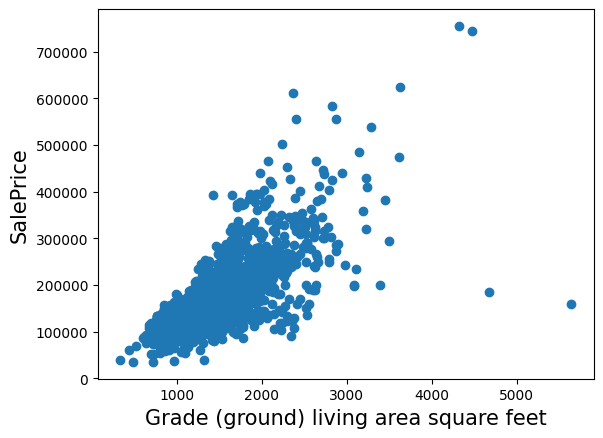

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Grade (ground) living area square feet', fontsize=15)
plt.show()

*The Living area and Sale Price have roughly a linear relationship.
1)- The two dots on the top indicate a sudden price increase. It may be because the house is located in a hot spot.
2)- The Two dots on the right-bottom where the GrLivingArea is more and the SalePrice is very less. It could be 
    agricultural land near the city.
These two points don’t obey the general pattern that is clearly visible. They don’t play by the rules. These are called Outliers. Feeding these two data points to our model might impede the model performance. And hence we should delete these outliers before modeling.

<Axes: xlabel='SalePrice', ylabel='Density'>

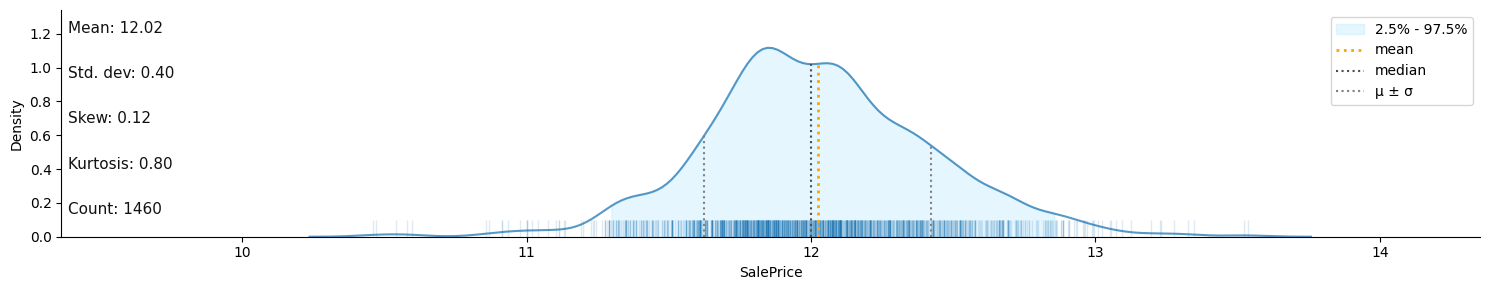

In [49]:
import klib 
klib.dist_plot(train['SalePrice'])

180921.19589041095
79415.29188606751


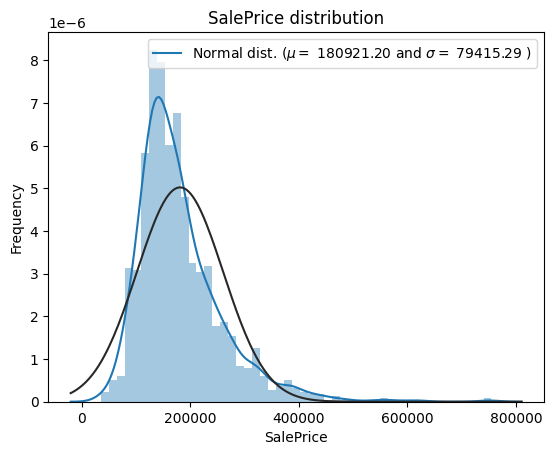

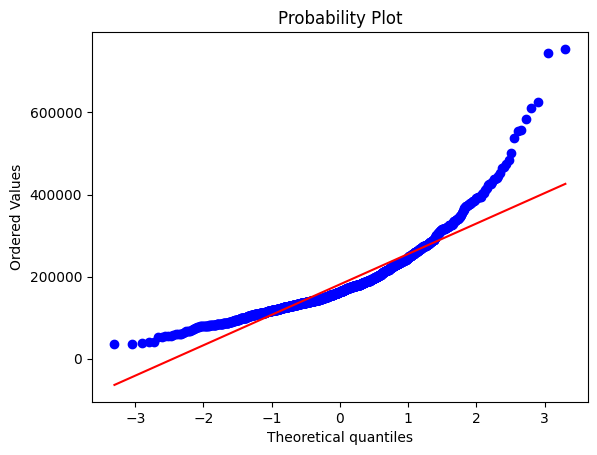

In [14]:
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print(mu)
print(sigma)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

As we can see in the graph, the data is not normally distributed. The linear models expect the data to be normally distributed. Hence we need to transform the variable to look like a normal distribution — a bell curve.


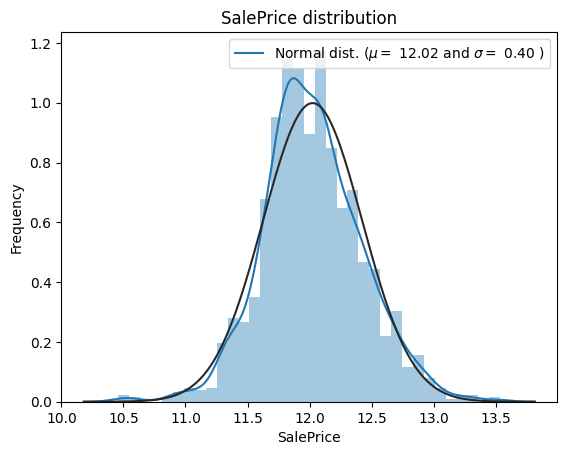

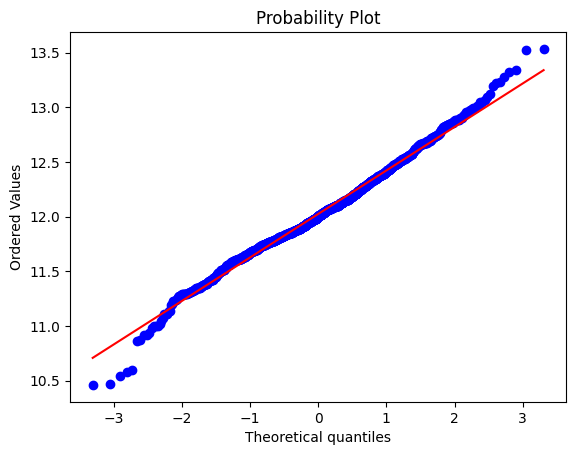

In [15]:
train["SalePrice"] = np.log1p(train["SalePrice"])
 
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

We have just done a log transformation to the ‘SalePrice’ variable which reduces the skew in the variable and results in a more or less normally distributed variable.

In [16]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


Find DataTypes

Numerical data distribution¶


In [17]:
list(set(train.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [18]:
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429220


Now let us plot the distribution for all the numerical features.

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

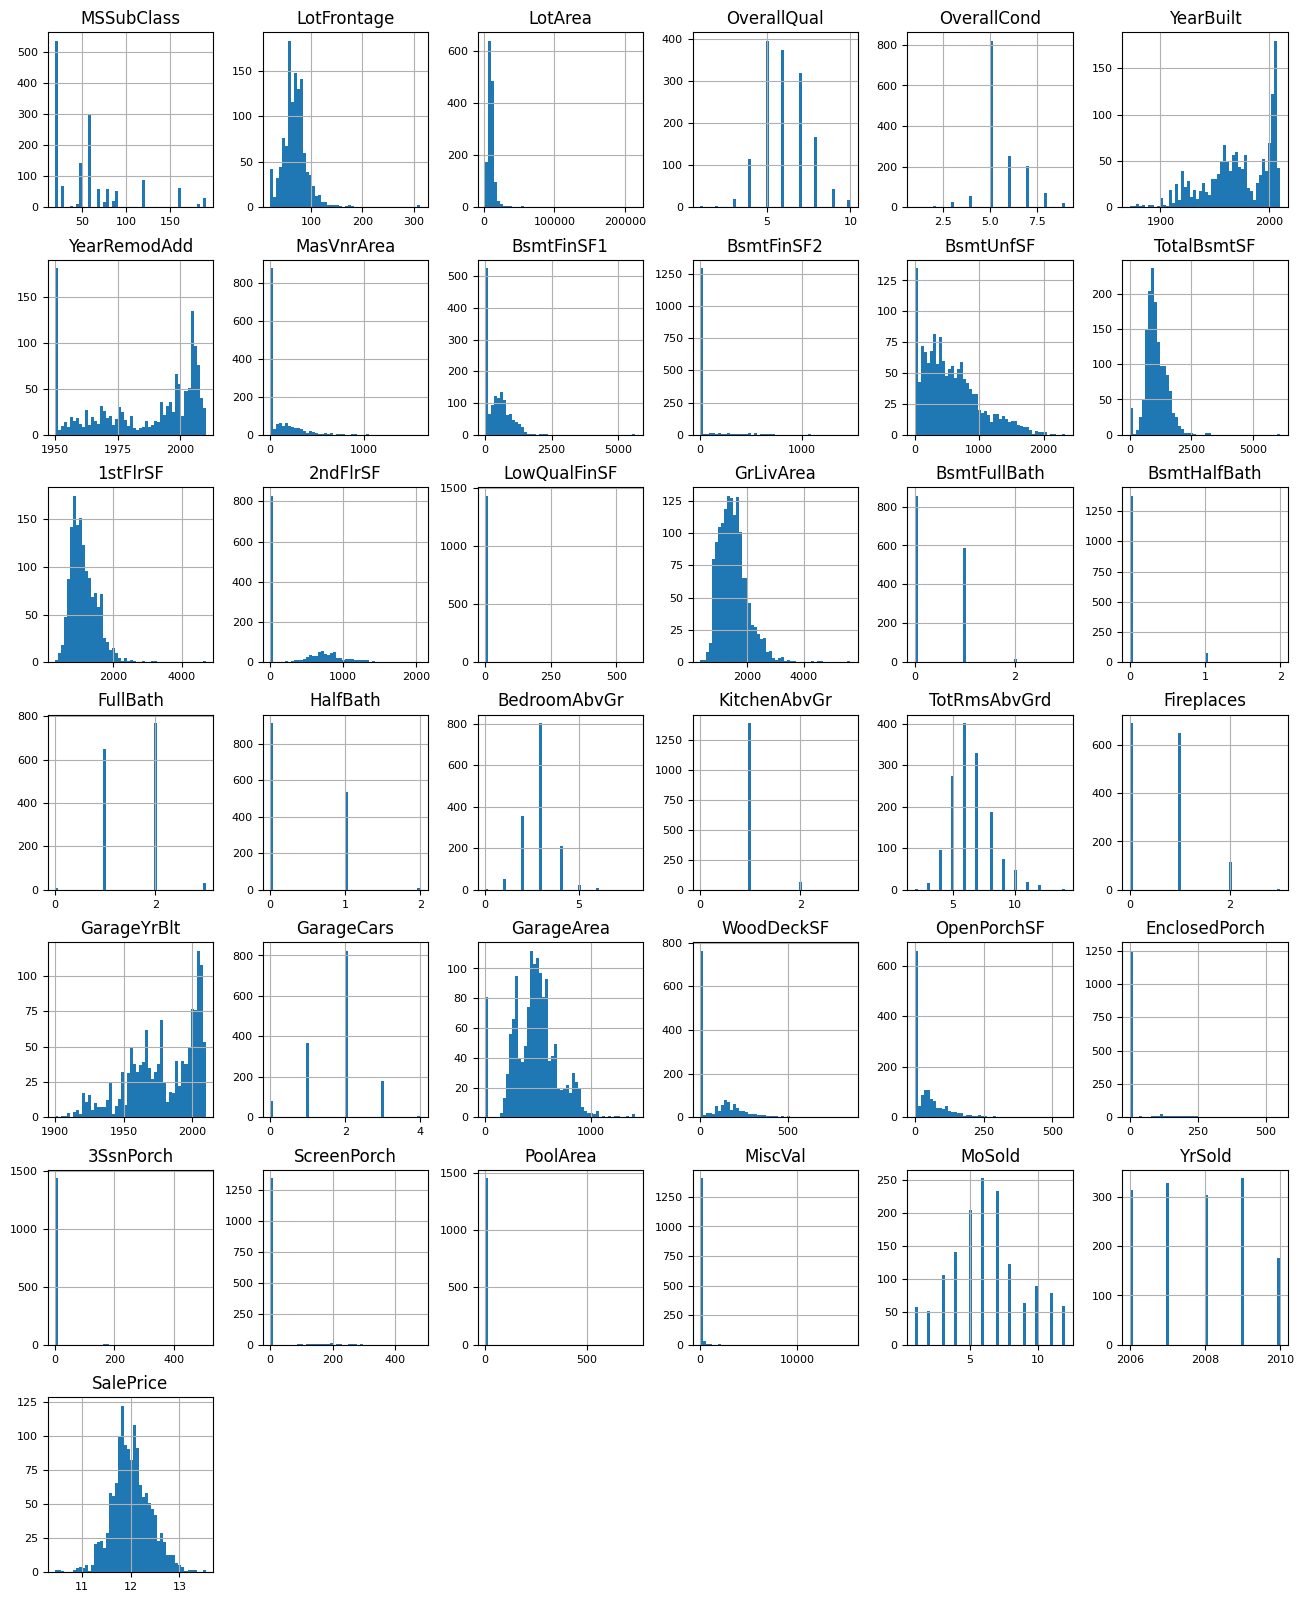

In [19]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [20]:
all_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

Null and Missing Values Study

In [21]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(15)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
MasVnrType,60.500171
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


Top 5 The PoolQC, MiscFeature, Alley, Fence, and FireplaceQu. These variables don’t seem terribly important for predicting Sale Price. But let’s not drop them just yet. Let's fill the missing values with 0 or None and proceed with modeling.

Plot the missing values.

Text(0.5, 1.0, 'Percent missing data by feature')

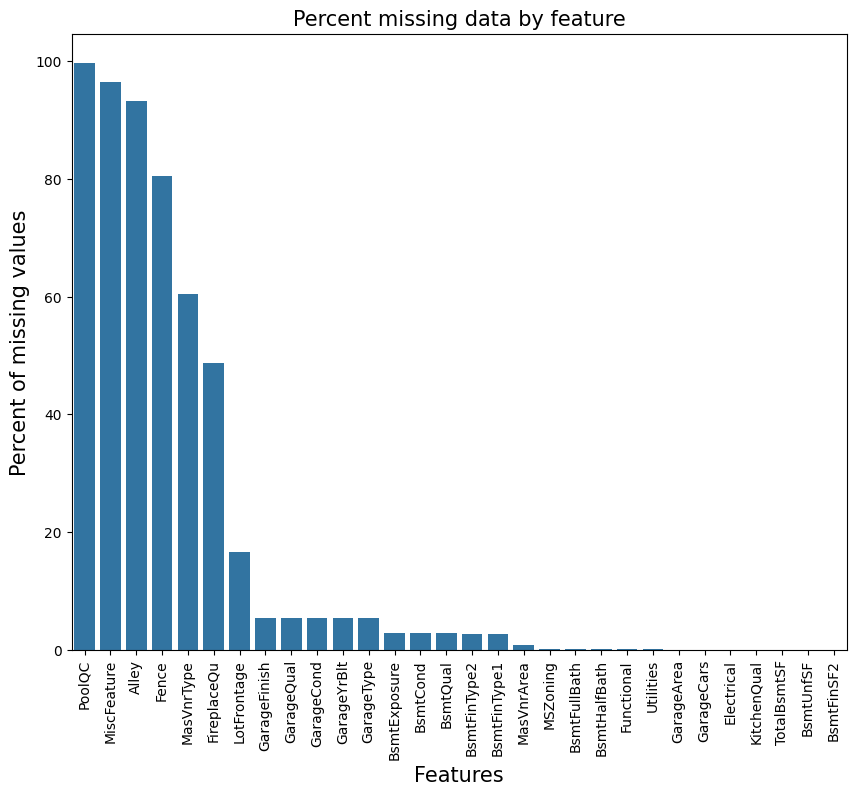

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


Data Cleaning

-We fill the missing values by 0 if the type of the input is an integer, and we fill 'None' if it’s categorical.

In [23]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

In [24]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu' ):
    all_data[col] = all_data[col].fillna('None')

In [25]:
all_data["LotFrontage"]

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2919, dtype: float64

Notice that the variable LotFrontage is of type "float". In general, the LotFrontage of a house is more or less equal to the Neighborhood houses. Hence we group the data by "Neighborhood" and fill the missing values with a median value of the neighborhood houses.

In [26]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [27]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [28]:
all_data["Utilities"].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

"Utilities" column, almost all the columns have the same value "AllPub", which means this variable is not going to help in prediction. Hence we drop this column.

In [29]:
all_data = all_data.drop(['Utilities'], axis=1)

In [30]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [31]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [32]:
all_data['OverallCond']

0       5
1       8
2       5
3       5
4       5
       ..
2914    7
2915    5
2916    7
2917    5
2918    5
Name: OverallCond, Length: 2919, dtype: int64

Now we change the data types of certain columns from "object" to "str".

In [33]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

"Area" plays important role in predicting the price, let's create a new column that contains the total area of the house including the basement, first floor, and second floor.

In [34]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [35]:
dfTrain = all_data[:ntrain]
dfTrain['SalePrice'] = y_train
dfTrain

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,2,2008,WD,Normal,2566.0,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,None,None,None,0,5,2007,WD,Normal,2524.0,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,None,None,None,0,9,2008,WD,Normal,2706.0,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,None,None,None,0,2,2006,WD,Abnorml,2473.0,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,None,None,None,0,12,2008,WD,Normal,3343.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,8,2007,WD,Normal,2600.0,12.072547
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,Inside,Gtl,...,None,MnPrv,None,0,2,2010,WD,Normal,3615.0,12.254868
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,...,None,GdPrv,Shed,2500,5,2010,WD,Normal,3492.0,12.493133
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,4,2010,WD,Normal,2156.0,11.864469


Correlation Study

We have 80 columns in our data set. Visualizing all the data takes a lot of time. We will consider the variables which are highly correlated (both positive and negative) with our target variable "SalePrice".

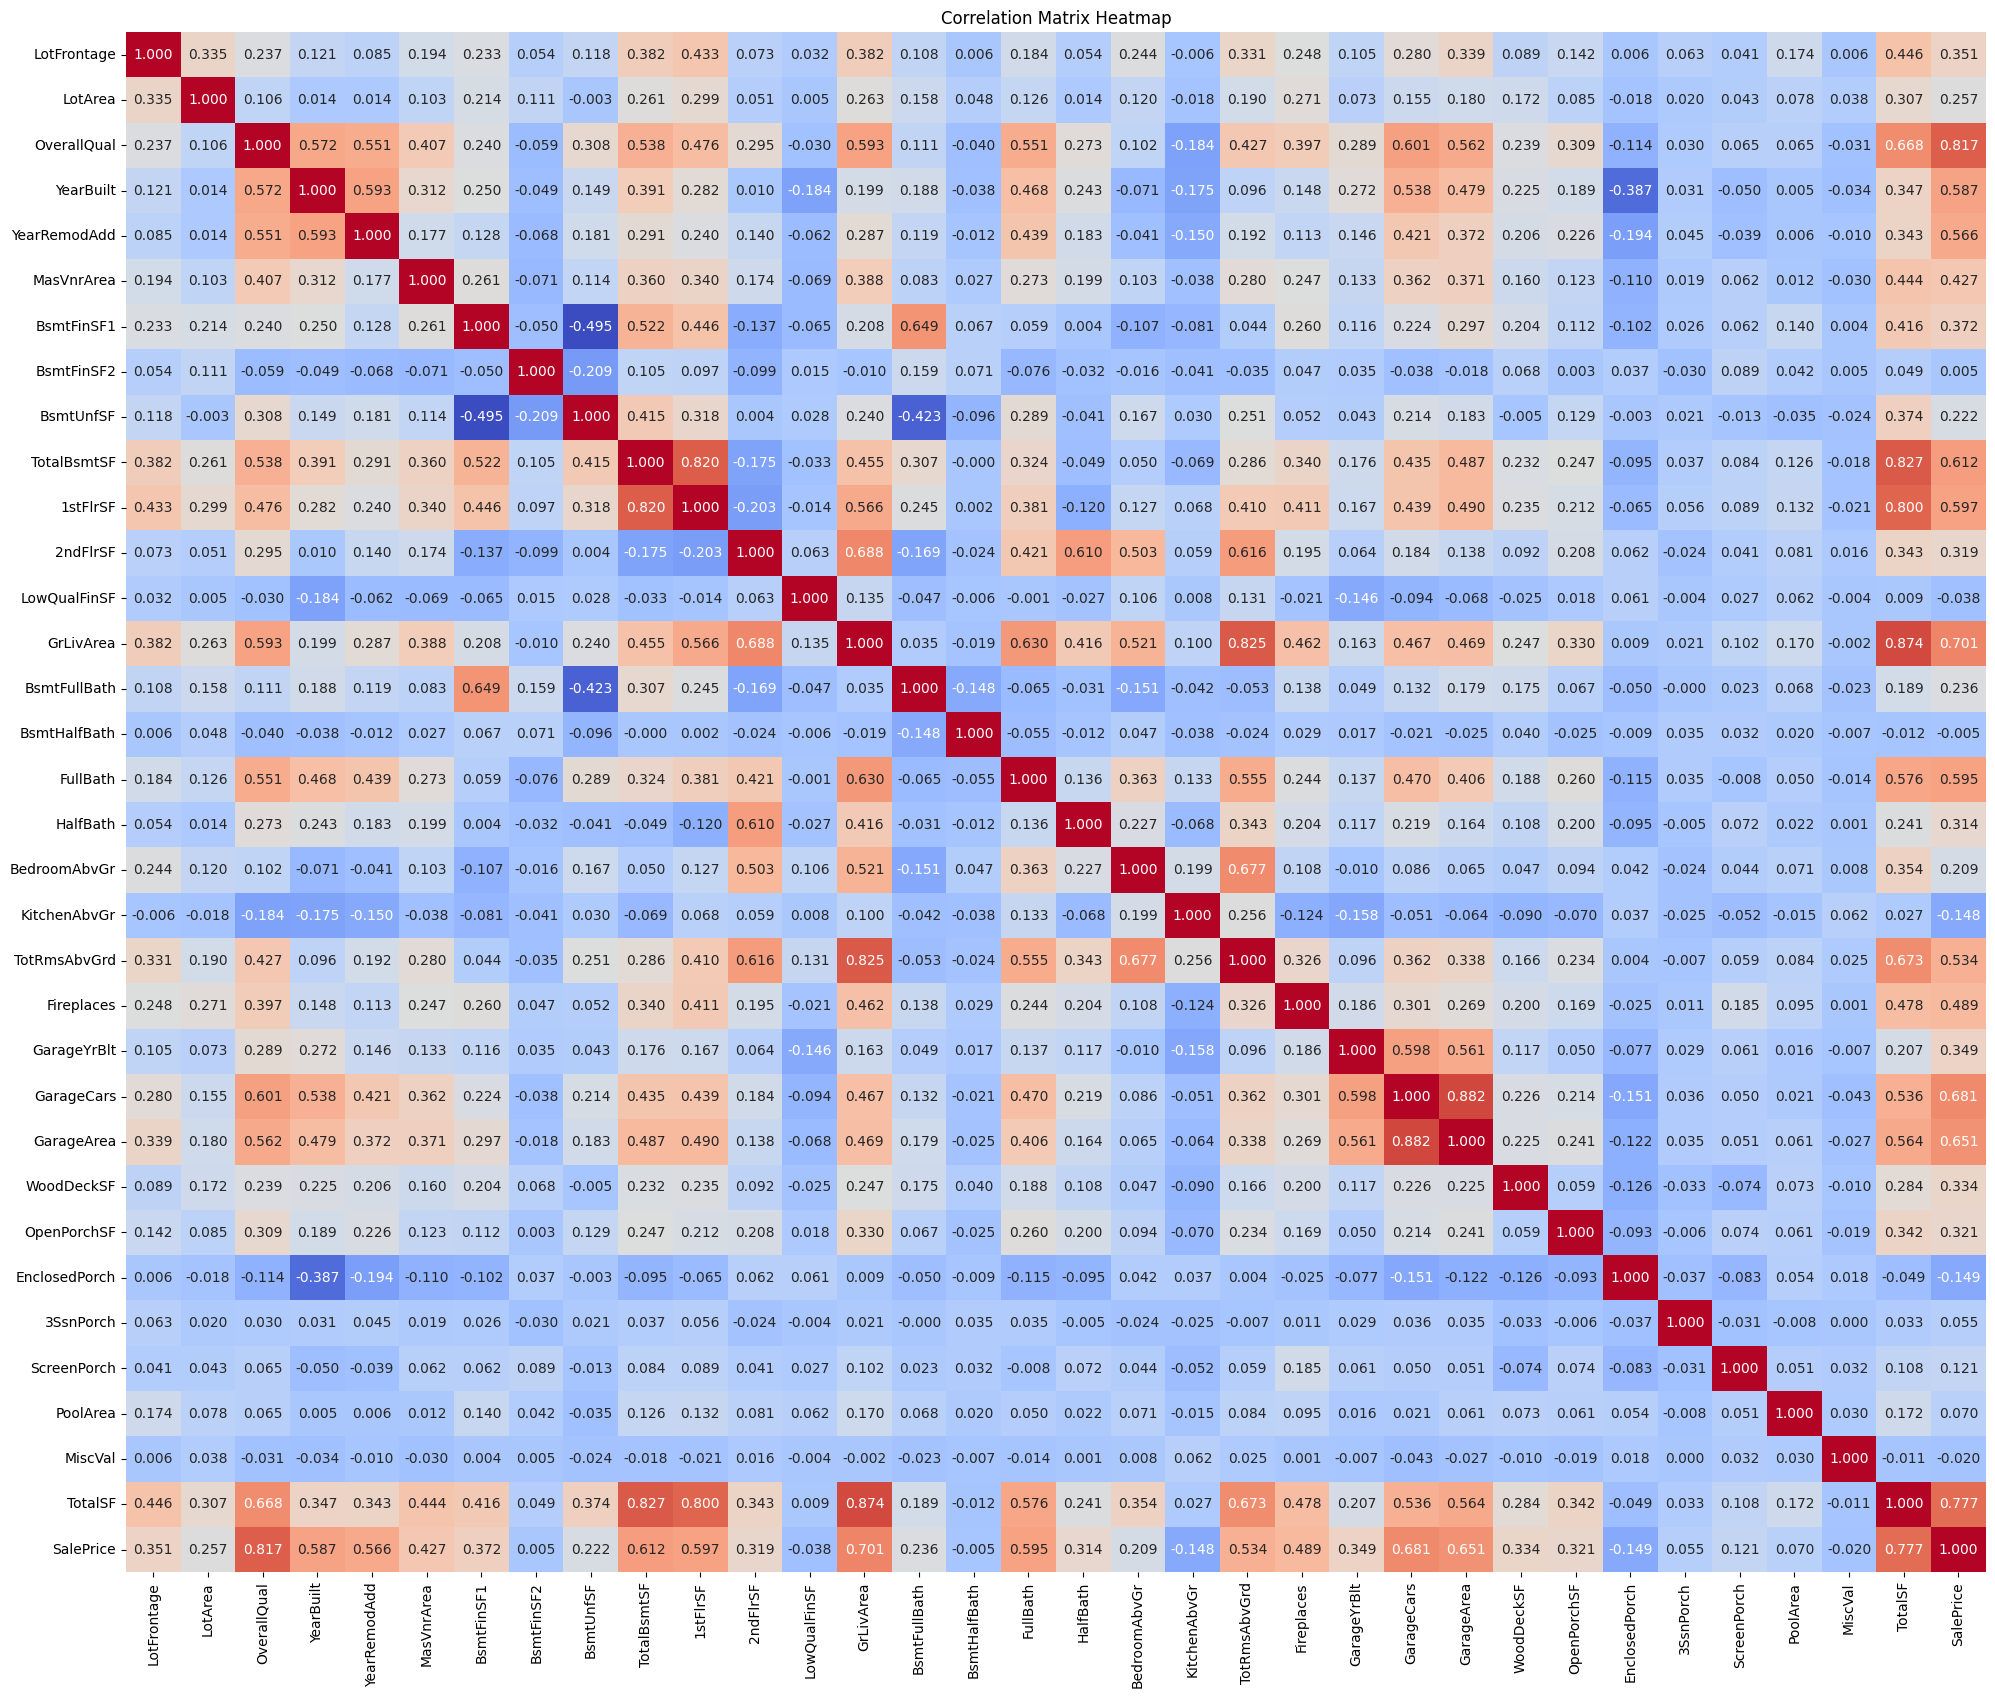

In [36]:
cols_cor = [col for col in  dfTrain.columns if dfTrain[col].dtype != 'object']
corrmat  = dfTrain[cols_cor].corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt=".3f", cbar=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [37]:
def get_correlated_features(corrdata, threshold):
    feature = []
    value = []
    for i , index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df2 = pd.DataFrame(data = value, index=feature, columns=['corr value'] )
    return df2
corr_df = get_correlated_features(corrmat['SalePrice'], 0.5)
corr_df

,corr value
OverallQual,0.817185
YearBuilt,0.586570
YearRemodAdd,0.565608
TotalBsmtSF,0.612134
1stFlrSF,0.596981
GrLivArea,0.700927
FullBath,0.594771
TotRmsAbvGrd,0.534422
GarageCars,0.680625
GarageArea,0.650888


We just got all the variables that are highly correlated with our target variable. Now let's look at the values of the correlated data.

In [38]:
correlated_data = dfTrain[corr_df.index]
correlated_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalSF,SalePrice
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,2566.0,12.247699
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,2524.0,12.109016
2,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,2706.0,12.317171
3,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,2473.0,11.849405
4,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,3343.0,12.429220


The heatmap of the correlated data to trigger our visual thinking.

<Axes: >

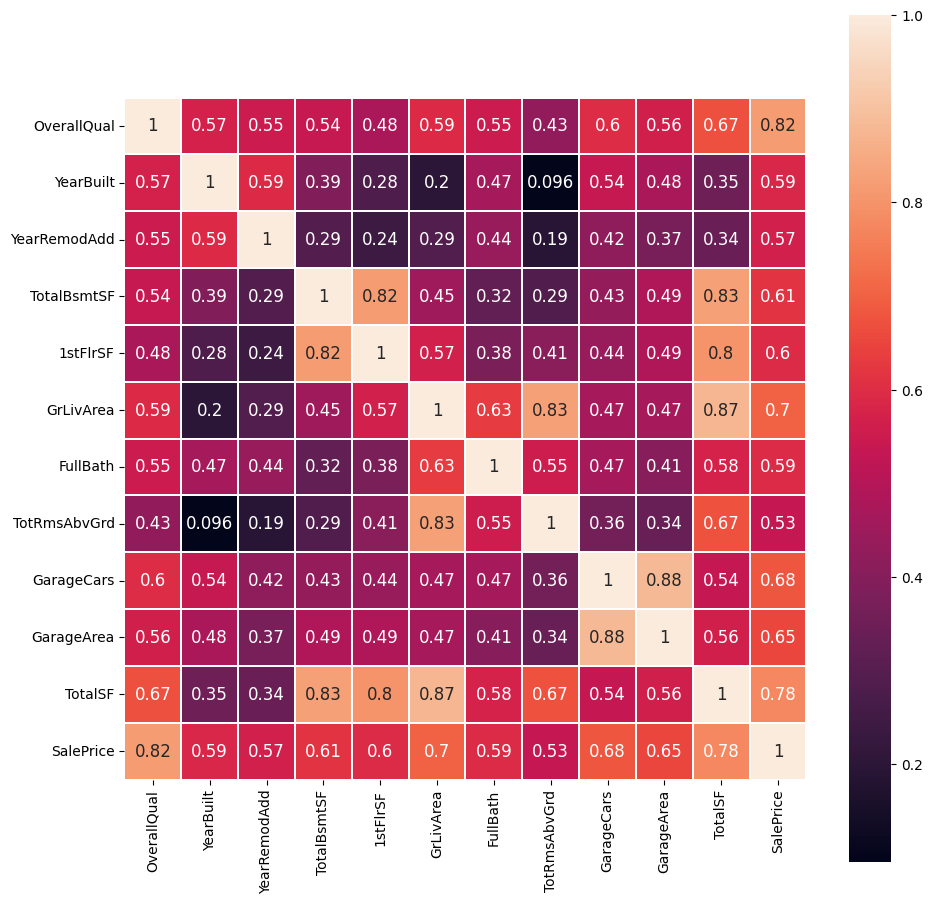

In [39]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(correlated_data.corr(), annot = True, annot_kws={'size': 12}, square=True, linecolor='w', linewidths=0.1)

From the above heatmap, garage space, general living area, and overall quality metric are highly correlated with our target variable.

Insights from Correlation Matrix:

**Overall Quality and Sale Price:**

1)-"OverallQual" (Overall Quality) has a strong positive correlation (approx. 0.82) with "SalePrice," indicating higher quality associates with higher sale prices.

**Garage-related Features:**

1)-"GarageCars" and "GarageArea" have a high positive correlation (approx. 0.88), suggesting a larger garage is associated with more car capacity.

2)-"GarageYrBlt" (Year garage was built) positively correlates (0.49) with "SalePrice."


**Living Area and Rooms:**

1)-"GrLivArea" (Above ground living area) strongly correlates (0.70) with "SalePrice," suggesting larger living areas lead to higher sale prices.

2)-"TotRmsAbvGrd" (Total rooms above ground) positively correlates with "SalePrice."


**Basement Features:**

1)-"TotalBsmtSF" (Total square feet of basement area) and "1stFlrSF" (First Floor square feet) highly positively correlate (0.61).

**Year of Construction and Remodeling:**

1)-"YearBuilt" (Year house was built) positively correlates (0.52) with "SalePrice."

2)- "YearRemodAdd" (Year of remodeling or addition) positively correlates (0.51) with "SalePrice."
Exterior Masonry Veneer Area:

3)- "MasVnrArea" (Masonry Veneer Area) has a positive correlation (0.48) with "SalePrice."


**Pool-related Feature:**

1)-"PoolArea" has a relatively low positive correlation (0.09) with "SalePrice," suggesting a pool may not strongly 
   influence sale price.

**Miscellaneous Features:**

1)-"MiscVal" (Value of miscellaneous feature) has a very low correlation with "SalePrice."


**Low-Quality Finished Area:**

1)-"LowQualFinSF" has a low negative correlation with "SalePrice."

Other Features:

1)-"EnclosedPorch," "3SsnPorch," and "ScreenPorch" have low correlations with "SalePrice," suggesting these features may   not strongly affect sale price.


Machine Learning

In [40]:
dfTrain

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,2,2008,WD,Normal,2566.0,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,None,None,None,0,5,2007,WD,Normal,2524.0,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,None,None,None,0,9,2008,WD,Normal,2706.0,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,None,None,None,0,2,2006,WD,Abnorml,2473.0,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,None,None,None,0,12,2008,WD,Normal,3343.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,8,2007,WD,Normal,2600.0,12.072547
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,Inside,Gtl,...,None,MnPrv,None,0,2,2010,WD,Normal,3615.0,12.254868
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,...,None,GdPrv,Shed,2500,5,2010,WD,Normal,3492.0,12.493133
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,4,2010,WD,Normal,2156.0,11.864469


In [41]:

X = dfTrain.drop('SalePrice', axis = 1)
y = dfTrain['SalePrice']

scaler = MinMaxScaler()
encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype != 'object':
        X[col] = scaler.fit_transform(X[[col]])
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

In [42]:
dfTrain

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,2,2008,WD,Normal,2566.0,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,None,None,None,0,5,2007,WD,Normal,2524.0,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,None,None,None,0,9,2008,WD,Normal,2706.0,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,None,None,None,0,2,2006,WD,Abnorml,2473.0,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,None,None,None,0,12,2008,WD,Normal,3343.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,8,2007,WD,Normal,2600.0,12.072547
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,Inside,Gtl,...,None,MnPrv,None,0,2,2010,WD,Normal,3615.0,12.254868
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,...,None,GdPrv,Shed,2500,5,2010,WD,Normal,3492.0,12.493133
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0,4,2010,WD,Normal,2156.0,11.864469


Model Development and Evaluation

In [58]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

To ensure fair treatment, we will use StandardScaler to standardize our data’s distribution making sure no feature disproportionately influences the model.

Note that only the feature variables needs to be scaled. Also, in simple linear regression, as there is only a single feature involved, scaling may be skipped.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled,y_train)
y_pred = linear_regression_model.predict(X_test_scaled)
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
print("R2 Score: ", r2_score(y_test,y_pred))

Mean Squared Error:  0.024337305708683882
R2 Score:  0.8695826762791481


****Next, we need to identify the best-fit line that represents the relationship b/w predictor, and the predictant. Our aim is to minimize the difference between the predicted & actual values by adjusting the slope, and intercept of the line.

****Finally, we have successfully built the model & now it’s time to put it through its paces & see how it holds up. For this, we calculate the MSE & the R2 Score of the model. Our aim here is to minimize the MSE & maximize the R2 Score.

In [60]:
y_pred = linear_regression_model.predict(X_test_scaled)
print("Mean Squared Error For Test Data: ", mean_squared_error(y_test,y_pred))
print("R2 Score For Test Data: ", r2_score(y_test,y_pred))

Mean Squared Error For Test Data:  0.024337305708683882
R2 Score For Test Data:  0.8695826762791481
